In [76]:
# directory set
import os
os.chdir("/Users/harryjeong/DA/Project/dacon_cup2020")

In [37]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 

In [39]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [40]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

In [41]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

In [50]:
train = pd.read_csv("./data/train.csv", encoding = 'euc-kr')
train['DateTime'] = pd.to_datetime(train.DateTime)
train['date'] = train.DateTime.dt.date
train  = train.groupby('date').sum().reset_index()

>expected=2698.0, predicted=2311.3
>expected=2452.0, predicted=2790.1
>expected=2196.0, predicted=2000.7
>expected=1617.0, predicted=1607.5
>expected=1858.0, predicted=2130.0
>expected=2907.0, predicted=2819.1
>expected=2662.0, predicted=2059.6
>expected=2605.0, predicted=2743.3
>expected=2268.0, predicted=2443.9
>expected=2037.0, predicted=2043.4
>expected=1439.0, predicted=1635.3
>expected=1485.0, predicted=3073.7
>expected=2204.0, predicted=2379.0
>expected=2360.0, predicted=3007.3
>expected=3180.0, predicted=1732.5
>expected=2423.0, predicted=2694.6
>expected=2086.0, predicted=2247.3
>expected=1495.0, predicted=1537.1
>expected=1444.0, predicted=1342.5
>expected=4080.0, predicted=2246.5
>expected=3247.0, predicted=3315.9
>expected=1674.0, predicted=3152.9
>expected=1268.0, predicted=2046.9
>expected=1474.0, predicted=2199.0
>expected=1573.0, predicted=2075.5
>expected=1685.0, predicted=2023.2
>expected=3091.0, predicted=2418.3
>expected=2786.0, predicted=2308.5
>expected=3032.0, pr

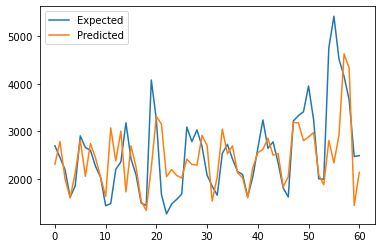

>expected=2649.0, predicted=2199.0
>expected=2435.0, predicted=2704.3
>expected=2145.0, predicted=2083.6
>expected=1596.0, predicted=1696.1
>expected=1804.0, predicted=2009.5
>expected=2814.0, predicted=3229.4
>expected=2550.0, predicted=2663.7
>expected=2546.0, predicted=2845.4
>expected=2254.0, predicted=2812.3
>expected=1973.0, predicted=2122.6
>expected=1411.0, predicted=1456.7
>expected=1488.0, predicted=2892.3
>expected=2155.0, predicted=2573.0
>expected=2284.0, predicted=2939.7
>expected=3200.0, predicted=2069.2
>expected=2372.0, predicted=2690.6
>expected=2048.0, predicted=2258.4
>expected=1463.0, predicted=1680.7
>expected=1402.0, predicted=1923.8
>expected=4017.0, predicted=1878.8
>expected=3163.0, predicted=2698.4
>expected=1638.0, predicted=2916.3
>expected=1252.0, predicted=1698.1
>expected=1442.0, predicted=2262.5
>expected=1539.0, predicted=1849.7
>expected=1646.0, predicted=1935.0
>expected=3001.0, predicted=1959.8
>expected=2729.0, predicted=2456.1
>expected=2958.0, pr

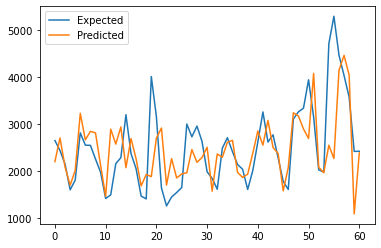

>expected=601.0, predicted=755.0
>expected=549.0, predicted=607.6
>expected=471.0, predicted=575.0
>expected=329.0, predicted=614.7
>expected=337.0, predicted=446.2
>expected=588.0, predicted=658.9
>expected=585.0, predicted=659.4
>expected=565.0, predicted=605.6
>expected=570.0, predicted=608.6
>expected=484.0, predicted=473.9
>expected=278.0, predicted=380.5
>expected=314.0, predicted=260.5
>expected=547.0, predicted=555.9
>expected=593.0, predicted=637.1
>expected=995.0, predicted=554.4
>expected=581.0, predicted=690.3
>expected=500.0, predicted=479.9
>expected=288.0, predicted=334.6
>expected=306.0, predicted=316.8
>expected=1165.0, predicted=486.5
>expected=760.0, predicted=967.3
>expected=345.0, predicted=690.4
>expected=228.0, predicted=548.2
>expected=272.0, predicted=397.6
>expected=290.0, predicted=386.8
>expected=359.0, predicted=371.5
>expected=747.0, predicted=310.5
>expected=624.0, predicted=261.3
>expected=763.0, predicted=411.3
>expected=564.0, predicted=513.8
>expected

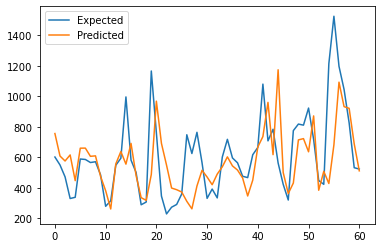

>expected=58683.0, predicted=62776.1
>expected=52726.0, predicted=62677.7
>expected=50026.0, predicted=44511.9
>expected=37620.0, predicted=54171.8
>expected=44793.0, predicted=47978.9
>expected=73765.0, predicted=41693.2
>expected=60192.0, predicted=86769.0
>expected=54994.0, predicted=56395.2
>expected=49503.0, predicted=57800.1
>expected=42539.0, predicted=48914.1
>expected=30362.0, predicted=39832.8
>expected=28586.0, predicted=35315.2
>expected=43600.0, predicted=35186.3
>expected=46324.0, predicted=53312.4
>expected=76103.0, predicted=42775.2
>expected=51781.0, predicted=60151.2
>expected=43434.0, predicted=43599.9
>expected=32409.0, predicted=44324.9
>expected=31355.0, predicted=42359.6
>expected=97762.0, predicted=30534.5
>expected=79330.0, predicted=78155.0
>expected=39526.0, predicted=65398.7
>expected=30269.0, predicted=43652.6
>expected=31416.0, predicted=40150.5
>expected=34846.0, predicted=41709.7
>expected=34965.0, predicted=58817.2
>expected=72422.0, predicted=40575.6
>

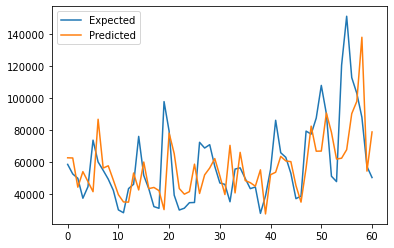

In [68]:
from pandas import Series
sub = DataFrame()
for col in train.columns[1:]:
    # load the dataset
    values = [[x] for x in train[col].values]
    # transform the time series data into supervised learning
    data = series_to_supervised(values, n_in=6)
    # evaluate
    mae, y, yhat = walk_forward_validation(data, 61)
    print('MAE: %.3f' % mae)
    # plot expected vs preducted
    pyplot.plot(y, label='Expected')
    pyplot.plot(yhat, label='Predicted')
    pyplot.legend()
    pyplot.show()
    x = Series(yhat)
    sub[col] = x.tail(n=61).values

In [69]:
sub

,사용자,세션,신규방문자,페이지뷰
0,2311.263672,2199.003906,754.976624,62776.070312
1,2790.120117,2704.287109,607.568420,62677.703125
2,2000.669556,2083.606201,574.958557,44511.863281
3,1607.545898,1696.068970,614.702820,54171.808594
4,2130.025146,2009.538208,446.225677,47978.859375
...,...,...,...,...
56,2926.525635,4150.415527,1091.803101,90241.695312
57,4630.748047,4468.042480,931.311707,97914.460938
58,4328.508789,4048.970947,920.484497,137809.187500
59,1447.124268,1081.667725,687.448242,54500.359375


In [77]:
sub = pd.read_csv("submission.csv", encoding = 'euc-kr')
sub['사용자']=sub['사용자']

In [78]:
sub.to_csv('sub_xgb.csv',index=False, encoding = 'euc-kr')